<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.642946,38.645187,-366.267506,-256.979374,170.778078,-427.757451
1,0.0,1.0,80.906985,82.546608,1308.443320,1481.896913,378.523655,1103.373258
2,0.0,2.0,77.013346,50.851977,210.789448,348.654772,260.437699,88.217072
3,0.0,3.0,60.916779,59.656635,76.240198,206.813612,242.206148,-35.392536
4,0.0,4.0,46.067163,33.090752,-78.378557,10.779358,108.807159,-98.027801
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,56.741450,69.805464,-833.934488,-697.387575,182.893278,-880.280852
249996,999.0,246.0,64.135818,31.246897,-134.236109,-28.853394,106.899923,-135.753317
249997,999.0,247.0,78.371804,79.817647,152.054490,320.243940,148.228496,172.015444
249998,999.0,248.0,46.503093,81.975453,493.711197,632.189743,225.136647,407.053095


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.642946,38.645187,-366.267506,-256.979374,170.778078,-427.757451
1,0.0,1.0,80.906985,82.546608,1308.443320,1481.896913,378.523655,1103.373258
2,0.0,2.0,77.013346,50.851977,210.789448,348.654772,260.437699,88.217072
3,0.0,3.0,60.916779,59.656635,76.240198,206.813612,242.206148,-35.392536
4,0.0,4.0,46.067163,33.090752,-78.378557,10.779358,108.807159,-98.027801
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,56.741450,69.805464,-833.934488,-697.387575,182.893278,-880.280852
249996,999.0,246.0,64.135818,31.246897,-134.236109,-28.853394,106.899923,-135.753317
249997,999.0,247.0,78.371804,79.817647,152.054490,320.243940,148.228496,172.015444
249998,999.0,248.0,46.503093,81.975453,493.711197,632.189743,225.136647,407.053095


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    60.642946  38.645187  -366.267506  -256.979374  170.778078   
      1.0    80.906985  82.546608  1308.443320  1481.896913  378.523655   
      2.0    77.013346  50.851977   210.789448   348.654772  260.437699   
      3.0    60.916779  59.656635    76.240198   206.813612  242.206148   
      4.0    46.067163  33.090752   -78.378557    10.779358  108.807159   
...                ...        ...          ...          ...         ...   
999.0 245.0  56.741450  69.805464  -833.934488  -697.387575  182.893278   
      246.0  64.135818  31.246897  -134.236109   -28.853394  106.899923   
      247.0  78.371804  79.817647   152.054490   320.243940  148.228496   
      248.0  46.503093  81.975453   493.711197   632.189743  225.136647   
      249.0  81.029402  23.656168  -150.327572   -35.642002   56.280774   

                   e_hat  
rep   index               
0.0   0.0    -427.757451  
      1.0    1103.373258  
      2.0      88.217072  
      3.0     -35.392536  
      4.0     -98.027801  
...                  ...  
999.0 245.0  -880.280852  
      246.0  -135.753317  
      247.0   172.015444  
      248.0   407.053095  
      249.0   -91.922776  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    60.642946  38.645187  -366.267506  -256.979374  170.778078   
      1.0    80.906985  82.546608  1308.443320  1481.896913  378.523655   
      2.0    77.013346  50.851977   210.789448   348.654772  260.437699   
      3.0    60.916779  59.656635    76.240198   206.813612  242.206148   
      4.0    46.067163  33.090752   -78.378557    10.779358  108.807159   
...                ...        ...          ...          ...         ...   
999.0 245.0  56.741450  69.805464  -833.934488  -697.387575  182.893278   
      246.0  64.135818  31.246897  -134.236109   -28.853394  106.899923   
      247.0  78.371804  79.817647   152.054490   320.243940  148.228496   
      248.0  46.503093  81.975453   493.711197   632.189743  225.136647   
      249.0  81.029402  23.656168  -150.327572   -35.642002   56.280774   

                   e_hat  
rep   index               
0.0   0.0    -427.757451  
      1.0    1103.373258  
      2.0      88.217072  
      3.0     -35.392536  
      4.0     -98.027801  
...                  ...  
999.0 245.0  -880.280852  
      246.0  -135.753317  
      247.0   172.015444  
      248.0   407.053095  
      249.0   -91.922776  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.642946,38.645187,-366.267506,-256.979374,170.778078,-427.757451
1,0.0,1.0,80.906985,82.546608,1308.443320,1481.896913,378.523655,1103.373258
2,0.0,2.0,77.013346,50.851977,210.789448,348.654772,260.437699,88.217072
3,0.0,3.0,60.916779,59.656635,76.240198,206.813612,242.206148,-35.392536
4,0.0,4.0,46.067163,33.090752,-78.378557,10.779358,108.807159,-98.027801
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,56.741450,69.805464,-833.934488,-697.387575,182.893278,-880.280852
249996,999.0,246.0,64.135818,31.246897,-134.236109,-28.853394,106.899923,-135.753317
249997,999.0,247.0,78.371804,79.817647,152.054490,320.243940,148.228496,172.015444
249998,999.0,248.0,46.503093,81.975453,493.711197,632.189743,225.136647,407.053095


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    60.642946  38.645187  -366.267506  -256.979374  170.778078   
      1.0    80.906985  82.546608  1308.443320  1481.896913  378.523655   
      2.0    77.013346  50.851977   210.789448   348.654772  260.437699   
      3.0    60.916779  59.656635    76.240198   206.813612  242.206148   
      4.0    46.067163  33.090752   -78.378557    10.779358  108.807159   
...                ...        ...          ...          ...         ...   
999.0 245.0  56.741450  69.805464  -833.934488  -697.387575  182.893278   
      246.0  64.135818  31.246897  -134.236109   -28.853394  106.899923   
      247.0  78.371804  79.817647   152.054490   320.243940  148.228496   
      248.0  46.503093  81.975453   493.711197   632.189743  225.136647   
      249.0  81.029402  23.656168  -150.327572   -35.642002   56.280774   

                   e_hat  
rep   index               
0.0   0.0    -427.757451  
      1.0    1103.373258  
      2.0      88.217072  
      3.0     -35.392536  
      4.0     -98.027801  
...                  ...  
999.0 245.0  -880.280852  
      246.0  -135.753317  
      247.0   172.015444  
      248.0   407.053095  
      249.0   -91.922776  

[250000 rows x 6 columns]

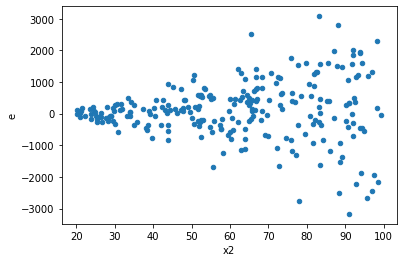

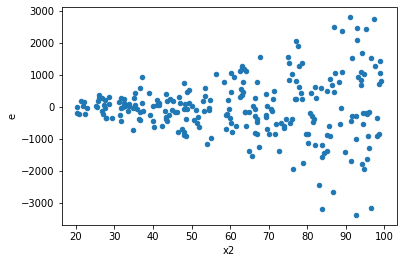

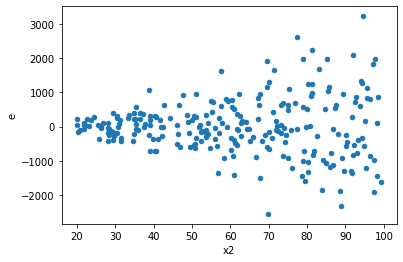

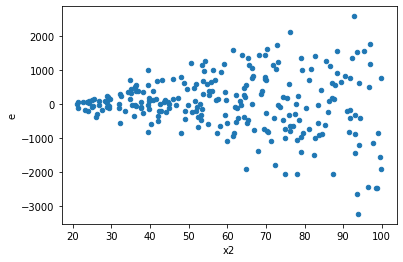

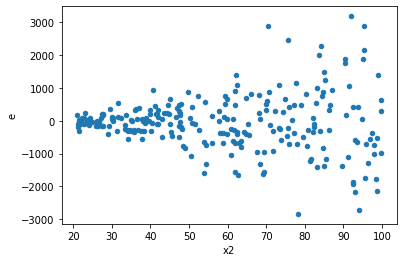

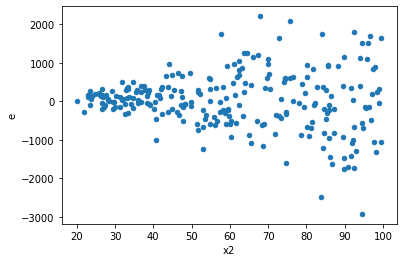

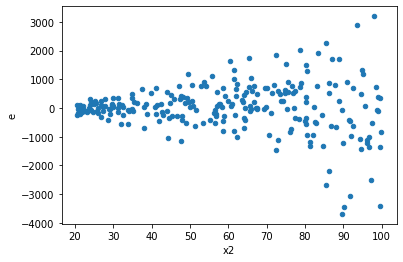

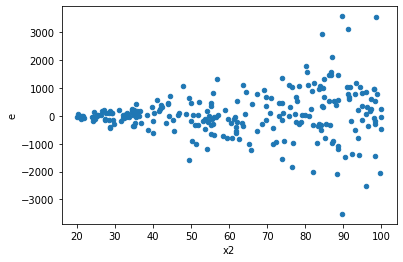

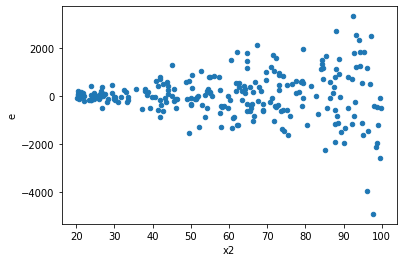

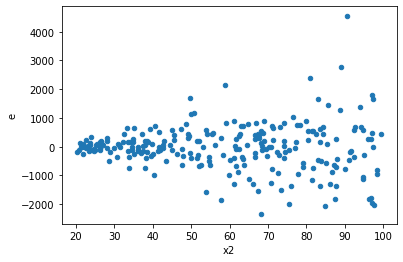

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,13007907.411904292,161968899.9174403,132733.7491010642,1652743.8767085744,12.451572323555528,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,12726799.911362367,176059391.71305332,129865.30521798333,1796524.405235238,13.83375184172332,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,12158887.681660784,124218361.61527829,124070.28246592637,1267534.3021967171,10.216260308304063,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,13011748.062216299,134422738.63645235,132772.9394103704,1371660.5983311464,10.330874682917589,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,6607908.529351694,143404246.78421095,67427.63805460912,1463308.6406552137,21.70191160292596,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,8846090.06660108,99053181.70434712,90266.22516939878,1010746.7520851747,11.197396924357358,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,11005547.657300306,148684914.58980125,112301.50670714598,1517193.0060183802,13.50999688699491,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,12606285.904608296,140357800.10887524,128635.5704551867,1432222.4500905636,11.133953423788896,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,16295048.426912682,181029506.03524137,166276.00435625185,1847239.8575024628,11.109479474528928,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,13007907.411904292,161968899.9174403,132733.7491010642,1652743.8767085744,12.451572323555528,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,12726799.911362367,176059391.71305332,129865.30521798333,1796524.405235238,13.83375184172332,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,12158887.681660784,124218361.61527829,124070.28246592637,1267534.3021967171,10.216260308304063,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,13011748.062216299,134422738.63645235,132772.9394103704,1371660.5983311464,10.330874682917589,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,6607908.529351694,143404246.78421095,67427.63805460912,1463308.6406552137,21.70191160292596,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,8846090.06660108,99053181.70434712,90266.22516939878,1010746.7520851747,11.197396924357358,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,11005547.657300306,148684914.58980125,112301.50670714598,1517193.0060183802,13.50999688699491,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,12606285.904608296,140357800.10887524,128635.5704551867,1432222.4500905636,11.133953423788896,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,16295048.426912682,181029506.03524137,166276.00435625185,1847239.8575024628,11.109479474528928,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64